In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_mat(n):
    """
    Генерация входных матриц.
    Проверяем, является ли n степенью двойки,
    если нет - достраиваем матрицу до нужного
    размера нулевыми столбцами и строками.
    :param n: размер матрицы
    :return: res - целочисленная матрица
    """
    res = np.random.randint(0, 51, (n, n))
    if np.modf(np.log2(n))[0] != 0:
        add = int((2 ** (np.floor(np.log2(n)) + 1)) - n)
        zeros = np.zeros((n + add, n + add), dtype=int)
        zeros[:n, :n] = res
        res = zeros
    return res

In [3]:
def get_submat(X):
    """
    Выделение подматриц
    :param X: матрица
    :return: кортеж подматриц
    """
    n = np.shape(X)[0] // 2
    a11 = X[:n, :n]
    a12 = X[:n, n:]
    a21 = X[n:, :n]
    a22 = X[n:, n:]
    return a11, a12, a21, a22

In [4]:
def strassen(A, B):
    """
    Имлементация алгоритма Штрассена
    :param A: первый множитель
    :param B: второй множитель
    :return: С -  результат умножения
    """

    n = np.shape(A)[0]
    C = np.zeros_like(A)

    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
        return C
    else:

        k = n // 2

        A11, A12, A21, A22 = get_submat(A)
        B11, B12, B21, B22 = get_submat(B)

        S1 = B12 - B22
        S2 = A11 + A12
        S3 = A21 + A22
        S4 = B21 - B11
        S5 = A11 + A22
        S6 = B11 + B22
        S7 = A12 - A22
        S8 = B21 + B22
        S9 = A11 - A21
        S10 = B11 + B12

        P1 = strassen(A11, S1)
        P2 = strassen(S2, B22)
        P3 = strassen(S3, B11)
        P4 = strassen(A22, S4)
        P5 = strassen(S5, S6)
        P6 = strassen(S7, S8)
        P7 = strassen(S9, S10)

        C[:k, :k] = P5 + P4 - P2 + P6
        C[:k, k:] = P1 + P2
        C[k:, :k] = P3 + P4
        C[k:, k:] = P5 + P1 - P3 - P7

        return C

In [6]:
A, B = get_mat(3), get_mat(3)
print('Input:')
print(A, "\n")
print(B, "\n")

print('Strassen:')
print(strassen(A, B), "\n")
print('Numpy default function:')
print(np.matmul(A, B), "\n")

Input:
[[ 6 37  2  0]
 [15 31 13  0]
 [27  8 16  0]
 [ 0  0  0  0]] 

[[ 3 17  5  0]
 [49 37  0  0]
 [50 34 32  0]
 [ 0  0  0  0]] 

Strassen:
[[1931 1539   94    0]
 [2214 1844  491    0]
 [1273 1299  647    0]
 [   0    0    0    0]] 

Numpy default function:
[[1931 1539   94    0]
 [2214 1844  491    0]
 [1273 1299  647    0]
 [   0    0    0    0]] 



In [7]:
def wrapper():
    time_history = []
    orders = [2**i for i in range(2, 10)]
    for i in orders:
        A, B = get_mat(i), get_mat(i)
        since = time.time()
        strassen(A, B)
        time_elapsed = (time.time() - since)
        time_history.append(time_elapsed)
    return orders, time_history

   Matrix size  Time (seconds)  Differences
0            4        0.001331     0.000000
1            8        0.006494     4.878560
2           16        0.041046     6.320777
3           32        0.247588     6.031982
4           64        1.804134     7.286834
5          128       12.407686     6.877364
6          256       86.182914     6.945930
7          512      595.133183     6.905466


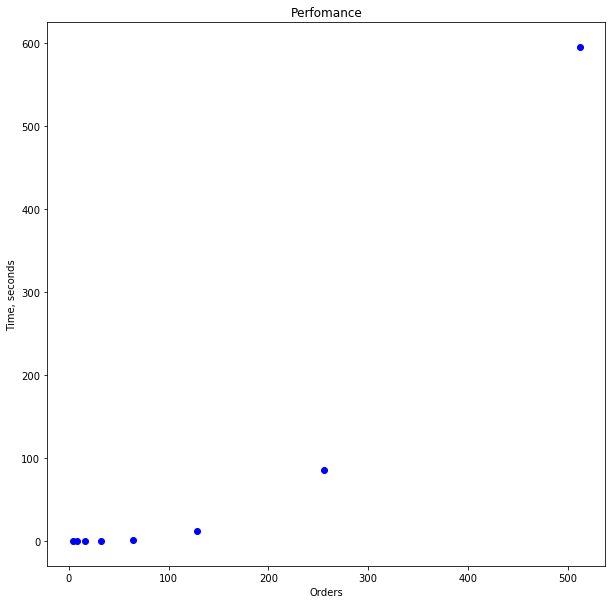

In [14]:
#sizes, times = wrapper()


diffs = [0]
for i in range(1, 8):
    diffs.append(times[i] / times[i - 1])


df = pd.DataFrame(list(zip(sizes, times, diffs)), columns=['Matrix size', 'Time (seconds)', 'Differences'] )
print(df)
df.to_csv('test_2.csv', sep='\t', index=False)

fig, ax = plt.subplots()
ax.set_ylabel('Time, seconds')
ax.set_xlabel('Orders')
ax.set_title('Perfomance')
ax.plot(sizes, times, 'bo')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.savefig('powers.png')
plt.show()

In [43]:
def wrapper():
    time_history = []
    orders = [i for i in range(2, 125)]
    for i in orders:
        A, B = get_mat(i), get_mat(i)
        since = time.time()
        strassen(A, B)
        time_elapsed = (time.time() - since)
        time_history.append(time_elapsed)
    return orders, time_history

     Matrix size  Time (seconds)
0              2        0.000754
1              3        0.000809
2              4        0.000795
3              5        0.005720
4              6        0.006504
..           ...             ...
118          120       12.321494
119          121       12.519459
120          122       12.481207
121          123       12.658295
122          124       12.318892

[123 rows x 2 columns]


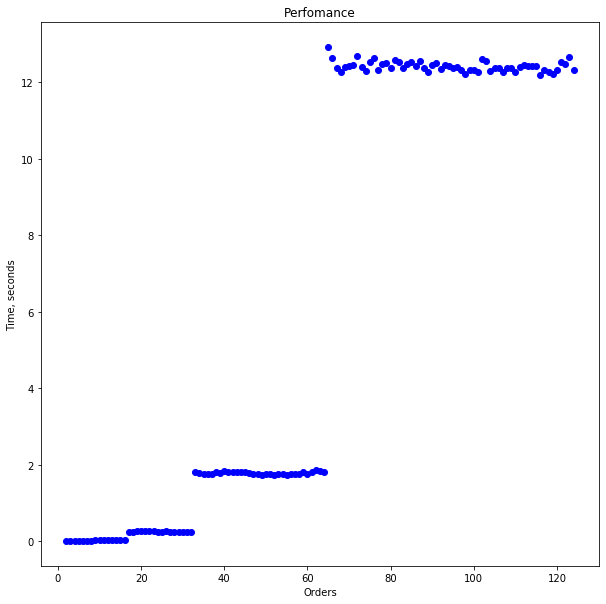

In [44]:
sizes, times = wrapper()
df = pd.DataFrame(list(zip(sizes, times)), columns=['Matrix size', 'Time (seconds)'] )
print(df)
#df.to_csv('test_2.csv', sep='\t', index=False)


fig, ax = plt.subplots()
ax.set_ylabel('Time, seconds')
ax.set_xlabel('Orders')
ax.set_title('Perfomance')
ax.plot(sizes, times, 'bo')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.savefig('linear.png')
plt.show()